# Adaptive Moment Estimation Function (Adam) 
This notebook aims to help gain a better understanding of the adaptive moment estimation function by comparing the trajectory of the loss function using the Adam, the normalized gradient descent step function, and the gradient descent step function.

### Imports 
Import the libraries needed to define the Adam, the normalized gradient descent step function, the gradient descent step function, and the loss function as well as plot the trajectory of the loss function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Define a Loss Function

In [2]:
def loss(phi0, phi1):
    height = np.exp(-0.5 * (phi1 * phi1)*4.0)
    height = height * np. exp(-0.5* (phi0-0.7) *(phi0-0.7)/4.0)
    return 1.0-height

### Define Gradient 
Define a function that computes the gradient of the loss function

In [3]:
def get_loss_gradient(phi0, phi1):
    delta_phi = 0.00001
    gradient = np.zeros((2,1))
    gradient[0] = (loss(phi0+delta_phi/2.0, phi1) - loss(phi0-delta_phi/2.0, phi1))/delta_phi
    gradient[1] = (loss(phi0, phi1+delta_phi/2.0) - loss(phi0, phi1-delta_phi/2.0))/delta_phi
    return gradient[:,0]

### Define Loss Computing Function
Define a function that computes the loss function over a range of parameters (phi0, phi1)

In [4]:
def get_loss_function_for_plot():
  grid_values = np.arange(-1.0,1.0,0.01)
  phi0mesh, phi1mesh = np.meshgrid(grid_values, grid_values)
  loss_function = np.zeros((grid_values.size, grid_values.size))
  for idphi0, phi0 in enumerate(grid_values):
      for idphi1, phi1 in enumerate(grid_values):
          loss_function[idphi0, idphi1] = loss(phi1,phi0)
  return loss_function, phi0mesh, phi1mesh

### Define Colormap 
Define a colormap for plotting the loss function

In [5]:
my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
r = np.floor(my_colormap_vals_dec/(256*256))
g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
my_colormap_vals = np.vstack((r,g,b)).transpose()/255.0
my_colormap = ListedColormap(my_colormap_vals)

### Define Loss Plotting Function

In [6]:
def draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, opt_path):
    fig = plt.figure()
    ax = plt.axes()
    fig.set_size_inches(7,7)
    ax.contourf(phi0mesh, phi1mesh, loss_function, 256, cmap=my_colormap)
    ax.contour(phi0mesh, phi1mesh, loss_function, 20, colors=['#80808080'])
    ax.plot(opt_path[0,:], opt_path[1,:],'-', color='#a0d9d3ff')
    ax.plot(opt_path[0,:], opt_path[1,:],'.', color='#a0d9d3ff',markersize=10)
    ax.set_xlabel(r"phi[0]")
    ax.set_ylabel(r"phi[1]")
    plt.show()

## Gradient Descent Step Function with Fixed Step Size

### Define Gradient Descent (fixed step size)
Define a gradient descent with fixed step size

In [7]:
def grad_descent(start_posn, n_steps, alpha):
    grad_path = np.zeros((2, n_steps+1))
    grad_path[:,0] = start_posn[:,0]
    for c_step in range(n_steps):
        this_grad = get_loss_gradient(grad_path[0,c_step], grad_path[1,c_step])
        grad_path[:,c_step+1] = grad_path[:,c_step] - alpha * this_grad
    return grad_path

### Compute Loss Function 
Compute the loss function over a range of parameters (phi0, phi1)

In [8]:
loss_function, phi0mesh, phi1mesh = get_loss_function_for_plot() 

### Define Start Position 
Define a start position of the loss function for the gradient descent step function

In [9]:
start_posn = np.zeros((2,1))
start_posn[0,0] = -0.7; start_posn[1,0] = -0.9

### Compute the Gradient Descent Step Function (200 steps)

In [10]:
grad_path1 = grad_descent(start_posn, n_steps=200, alpha = 0.08)

### Plot Intermediate Loss Functions 
Plot the trajectory of the loss function by plotting all the intermediate loss functions throughout all the iterations.

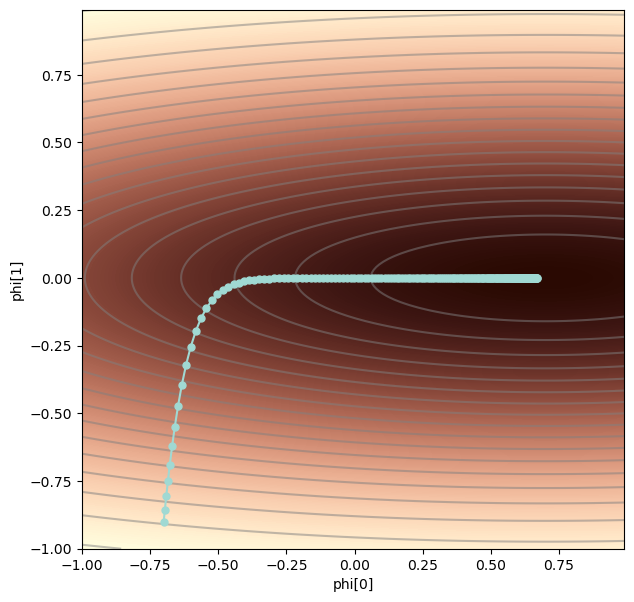

In [11]:
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path1)

### Compute the Gradient Descent Step Function (40 steps)

In [12]:
grad_path2 = grad_descent(start_posn, n_steps=40, alpha= 1.0)

### Plot Intermediate Loss Functions 
Plot the trajectory of the loss function by plotting all the intermediate loss functions throughout all the iterations.

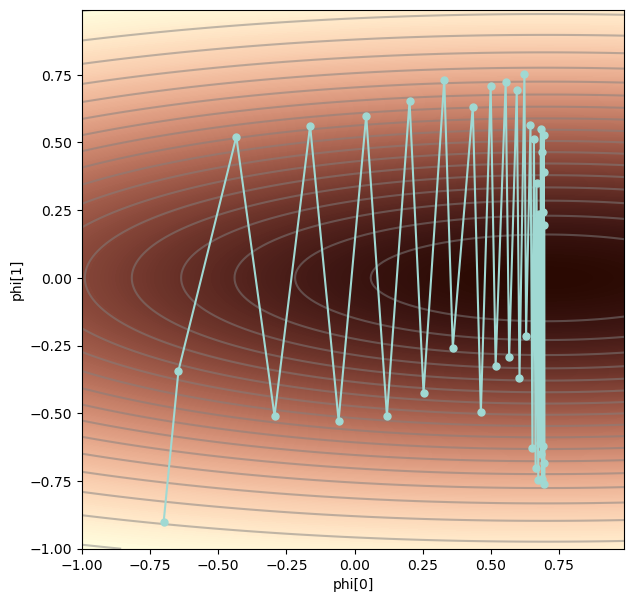

In [13]:
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path2)

## Normalized Gradient Step Function with Fixed Step Size

### Define a Normalized Gradient Step Function (Fixed Step Size)

In [14]:
def normalized_gradients(start_posn, n_steps, alpha,  epsilon=1e-20):
    grad_path = np.zeros((2, n_steps+1))
    grad_path[:,0] = start_posn[:,0]
    for c_step in range(n_steps):
        # Compute the gradient
        m = get_loss_gradient(grad_path[0,c_step], grad_path[1,c_step])
        # Compute the squared gradient
        v = m**2

        # Update the parameter using the normalized gradient
        grad_path[:,c_step+1] = grad_path[:,c_step] - alpha*((m)/(np.sqrt(v)+epsilon))

    return grad_path

### Define Start Position
Define a start position of the loss function for the normalized gradient descent step function

In [15]:
start_posn = np.zeros((2,1))
start_posn[0,0] = -0.7; start_posn[1,0] = -0.9

### Compute the Normalized Gradient Descent Step Function

In [16]:
grad_path1 = normalized_gradients(start_posn, n_steps=40, alpha = 0.08)

### Plot Intermediate Loss Functions
Plot the trajectory of the loss function by plotting all the intermediate loss functions throughout all the iterations.

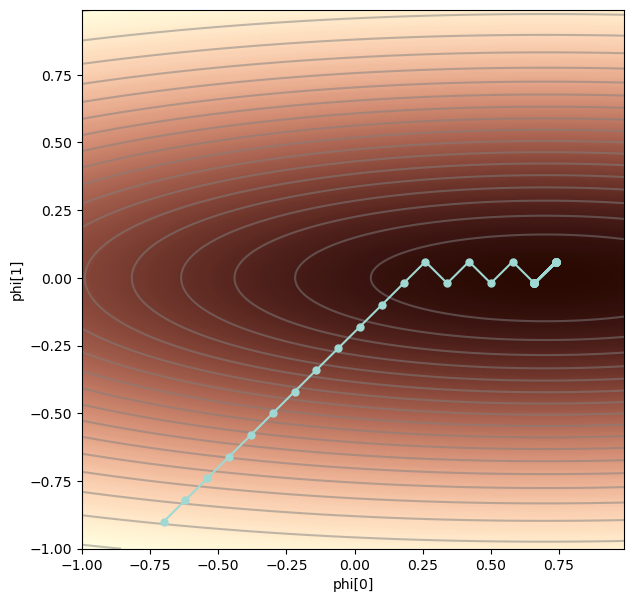

In [17]:
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path1)

## Adaptive Momentum Estimation Function (Adam)

## Define the Adaptive Momentum Estimation Function (Adam)

In [18]:
def adam(start_posn, n_steps, alpha,  beta=0.9, gamma=0.99, epsilon=1e-20):
    grad_path = np.zeros((2, n_steps+1))
    grad_path[:,0] = start_posn[:,0]
    m = np.zeros_like(grad_path[:,0])
    v = np.zeros_like(grad_path[:,0])
    for c_step in range(n_steps):
        # Compute the gradient
        grad = get_loss_gradient(grad_path[0,c_step], grad_path[1,c_step])
        # Compute the momentum based gradient
        m = beta*m + (1-beta)*grad
        # Compute the momentum based squared gradient 
        v = gamma * v + (1-gamma)*(grad**2)

        # Compute the bias-corrected momentum based gradient and squared gradient
        m_tilde = m / (1 - np.power(beta, c_step+1))
        v_tilde = v / (1 - np.power(gamma, c_step+1))


        # Update the function using the bias-corrected normalized momentum based gradient
        grad_path[:,c_step+1] = grad_path[:,c_step] - alpha*((m_tilde)/(np.sqrt(v_tilde)+epsilon))

    return grad_path

### Define Start Position
Define a start position of the loss function for the adaptive momentum estimation function

In [19]:
start_posn = np.zeros((2,1))
start_posn[0,0] = -0.7; start_posn[1,0] = -0.9

### Compute the Adaptive Momentum Estimation Function

In [20]:
grad_path1 = adam(start_posn, n_steps=60, alpha = 0.05)

### Plot Intermediate Loss Functions
Plot the trajectory of the loss function by plotting all the intermediate loss functions throughout all the iterations.

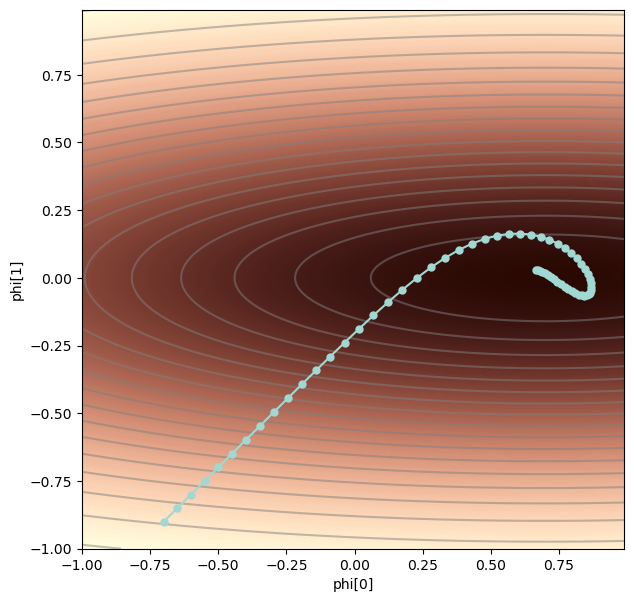

In [21]:
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path1)   